<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
Input layers are defined as a collection of all the possible input nodes. Can also be referred to as the visible layer. Input nodes have a 1 to 1 relationship with the number of features in a dataset.
### Hidden Layer:
Hidden layers are a collection of hidden nodes between a NN's input nodes and output nodes. Specifically it's a grouping for one step (think column-wise) in the NN. Hidden nodes take in input like input nodes and output as well, but they are just a step in the NN's map to produce an actual output. As a result, output of hidden nodes isn't meaningful.
### Output Layer:
The output layer is a collection of all the output nodes. The number of output nodes depends on the type of problem the NN is attempting to solve. For classification problems the number of output nodes will match up with the number of possible classes. Linear regression will have 1. Output nodes are basically the target (a value or class).
### Neuron:
Neurons are compenents of the human brain. In machine learning terms a neuron is a node. There are many different types of nodes, but the most important are the input, hidden, and output nodes.
### Weight:
Weights are values that hidden nodes possess. They are close to but not exactly like coefficients. They weight the input by however much and then pass the output to the next layer of nodes. Weighting can be initialized randomly and with gradient descent/backpropigation they can be adjusted accordingly through successive iterations.
### Activation Function:
Activation functions are the functions that certain nodes possess (mainly hidden?) that pass a value to the next layer of nodes. They are sometimes referred to as transfer functions. For classification networks the more common activation functions are sigmoid, tanh, step, relu.
### Node Map:
A node map is a diagram of how data flows in and out of the neural network. Node maps can vary ever so slightly from problem to problem but most maps will resemble the common neural network topologies like perceptrons, feed forward, RBF, DFF, etc.
### Perceptron:
Perceptrons are single layers neural networks. A neural network at its most basic. Perceptrons only have an input and output layer and thus no activation functions.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
Neural networks take input and produce output. Input nodes are the first layer of nodes in a neural network and are responsible for taking in the features initially. Input nodes then pass the given value to the "correct" hidden node. This node weights the input (multiplies by a certain value) and applies a bias (adding or subtracting a certain amount). Once the input is processed with the weight and bias the activation function passes this value to the next layer of nodes in the NN. This is repeated through however many layers of hidden nodes the NN has until it reaches the output layer which can either be a value or classification.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
import numpy as np

# Seperating the features (inputs) and the targets (outputs)
# Input arrays are the features of the 4 instances (rows)
inputs = np.array([
                   [0,0],
                   [1,0],
                   [0,1],
                   [1,1]
])

outputs = [[1],[1],[1],[0]]

# Weight Initialization
# Two random weights to match the number of features in our inputs
weights = 2 * np.random.random((2,1)) - 1

# Sigmoid functions for updating weights
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

"""
  STEPS TO INITIALIZE AND IMPROVE UPON A CLASSIFICATION PERCEPTRON'S WEIGHTS

  1. Initialize weights. Can be done randomly.
  2. Calculate the weighted sum of inputs and weights (dot product of inputs and weights).
  3. Output the activated value (sigmoid of weighted sum).
  4. Take the difference of the activated value and true values to get error.
  5. Use gradient descent/back propigation to get the adjustments to make to the perceptron's weights.
  6. Apply the adjustments to the weights.

  7. Repeat until reasonabily satisfied with the accuracy/error of the perceptron.
"""

for iteration in range(10000):

  weighted_sum = np.dot(inputs, weights) + 7
  activated_output = sigmoid(weighted_sum)
  error = outputs - activated_output # aka loss
  adjustments = error * sigmoid_derivative(weighted_sum)
  weights += np.dot(inputs.T, adjustments)

print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)


Weights after training
[[-4.66666667]
 [-4.66666667]]
Output after training
[[0.99908895]
 [0.91160032]
 [0.91160032]
 [0.08839968]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print('Glucose max:', df['Glucose'].max())
df.head()

Glucose max: 199


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [71]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

# Extracting feature names
features = list(X)[:-1]

# Using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,198))
X['Glucose'] = scaler.fit_transform(X['Glucose'].values.reshape(-1,1))
print('Evidence MinMaxScaler is working. \n New Glucose max:', df['Glucose'].max())

# Using Normalizer
transformer = Normalizer().fit_transform(X)
X = pd.DataFrame(transformer, index=None)
features.append('Unknown_column')
X.columns = features
X = X.drop(columns=['Unknown_column'])
X.head()

Evidence MinMaxScaler is working. 
 New Glucose max: 199


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.033668,0.826308,0.404018,0.196398,0.000000,0.188542,0.003518
1,0.008446,0.714280,0.557419,0.244926,0.000000,0.224657,0.002964
2,0.040572,0.923414,0.324574,0.000000,0.000000,0.118165,0.003408
3,0.006623,0.586529,0.437151,0.152340,0.622609,0.186120,0.001106
4,0.000000,0.594450,0.174439,0.152634,0.732642,0.187958,0.009978


In [0]:
##### Update this Class #####

class Perceptron(object):
  """ Perceptron class with fitting and predicting """


  def __init__(self, niter = 10):
    """ Perceptron Objects default to 10 perceptron iterations: niter = 10 """
    self.niter = niter
      

  def __sigmoid(self, x):
    """ Function to convert a value to a float between 0 and 1 """
    return 1 / (1 + np.exp(-x))
    

  def __sigmoid_derivative(self, x):
    """ Returns the derivite of the sigmoid value """
    sx = sigmoid(x)
    return sx * (1-sx)


  def fit(self, X, y):
    """ 
      Fit the data and perform n iterations over the perceptron 
      X = features
      y = target
    """
    self.weights = np.zeros(len(X[1]))
    inputs = X
    outputs = y

    for i in range(self.niter):
      weighted_sum = np.dot(inputs, self.weights) + 7
      self.activated_output = self.__sigmoid(weighted_sum)
      error = outputs - activated_output # aka loss
      adjustments = error * self.__sigmoid_derivative(weighted_sum)
      self.weights += np.dot(inputs.T, adjustments)

    return self


  def predict(self, X):
    net_input = np.dot(X, self.weights[1:]) + self.weights[0]
    return net_input

In [0]:
X = np.array(X.values.tolist())

In [80]:
# Implementing the class and using it to predict
pn = Perceptron(10)
pn.fit(X, y)

test_features = [1,1,1,1,1,1,1]
pn.predict(test_features)

"""
He spent so little time explaining his class and yet wants us to implement our own...Willing to bet money not many people implement this in a novel way. Copy and paste job below.
Will wait to see someone elses implementation in the Q&A. Not effective learning when the code is documented with so few comments and shorthand. Frustrating! Why not document code more
especially for code used as learning material?
"""

ValueError: ignored

In [79]:
X

array([[0.03366816, 0.82630812, 0.40401798, ..., 0.        , 0.18854172,
        0.00351832],
       [0.00844574, 0.7142802 , 0.55741866, ..., 0.        , 0.22465661,
        0.00296445],
       [0.04057172, 0.9234144 , 0.32457377, ..., 0.        , 0.11816514,
        0.00340802],
       ...,
       [0.02697281, 0.64946192, 0.38840848, ..., 0.60419097, 0.14133753,
        0.00132167],
       [0.00667662, 0.83702653, 0.40059711, ..., 0.        , 0.20096622,
        0.00233014],
       [0.00793612, 0.7343503 , 0.55552839, ..., 0.        , 0.24125804,
        0.00249988]])

In [0]:
""" COPY AND PASTE JOB BECAUSE HE DIDN'T EXPLAIN HIS PERCEPTRON CLASS MUCH AT ALL """
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

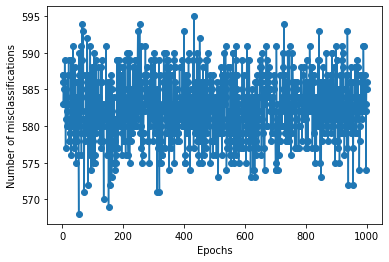

In [83]:
pn = Perceptron(0.1, 1000)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?